/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


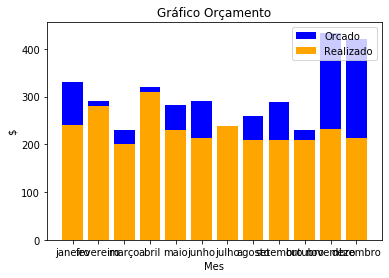

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

arquivosdados1 = pd.read_excel('dados.xlsx','realizado')
arquivosdados2 = pd.read_excel('dados.xlsx','orcado')

tabela1 = arquivosdados1.T.reset_index()
tabela1.drop('index',inplace=True, axis=1)
tabela1.columns = ['mês', 'Realizado']
tabela1 = tabela1.drop(0)

tabela2 = arquivosdados2.reset_index()
tabela2.drop('index',inplace=True, axis=1)

tabelageral = pd.merge(tabela2,tabela1, on='mês')
tabelageral['diferenca'] = '0'

for cont in tabelageral.itertuples():
    tabelageral.diferenca[cont.Index] = tabelageral.orcado[cont.Index] - tabelageral.Realizado[cont.Index]
tabelageral.to_csv('resultadofinal.csv', index=False)

dados = open('resultadofinal.csv').readlines()

x1 = []
y1 = []
x2 = []
y2 = []

for i in range(len(dados)):
  if i != 0:
    linha = dados[i].split(',')
    x1.append(linha[0])
    y1.append(linha[1])

for i in range(len(dados)):
  if i != 0:
    linha = dados[i].split(',')
    x2.append(linha[0])
    y2.append(linha[2])

y2=np.array(y2)
y1=np.array(y1)

mes = np.array(x1)
orange = y2.astype(np.int)
blue = y1.astype(np.int)
ind = [x for x, _ in enumerate(mes)]
plt.bar(ind, blue, width=0.8, label='Orcado', color='blue')
plt.bar(ind, orange, width=0.8, label='Realizado', color='orange')

plt.xticks(ind, mes)
plt.ylabel("$")
plt.xlabel("Mes")
plt.legend(loc="upper right")
plt.title("Gráfico Orçamento")

plt.savefig('grafico.png', format='png')
plt.show()
